In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-25 10:59:24.120180: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-25 10:59:24.194806: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-25 10:59:25.405408: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/RJ_Reconstrucao_Sciaenidae_2024_08_06.xlsx')

df_Pescadas = df[['Ano','Pesc_goete_ind', 'Pesc_amarela_ind', 'Pesc_bicuda_ind','Pesc_branca_ind','Pesc_cambucu_ind','Pesc_olhuda_ind','Pesc_banana_ind','Pesc_faneca_ind']].dropna().reset_index(drop=True)



for i in range(len(df_Pescadas['Ano'])):
  df_Pescadas.loc[i,'Soma'] = df_Pescadas.loc[i,'Pesc_goete_ind']+df_Pescadas.loc[i,'Pesc_amarela_ind']+df_Pescadas.loc[i,'Pesc_bicuda_ind']+df_Pescadas.loc[i,'Pesc_branca_ind']+df_Pescadas.loc[i,'Pesc_cambucu_ind']+df_Pescadas.loc[i,'Pesc_olhuda_ind']+df_Pescadas.loc[i,'Pesc_banana_ind']+df_Pescadas.loc[i,'Pesc_faneca_ind']
  
dados = df_Pescadas[['Ano','Pesc_cambucu_ind','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Pesc_cambucu_ind'] = dados.loc[i,'Pesc_cambucu_ind'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([2017,2018,2019,2020,2021,2022])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop= dados['Prop_Pesc_cambucu_ind'].values
dados.head()


/tmp/ipykernel_71605/3582158738.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.loc[i,'Prop_Pesc_cambucu_ind'] = dados.loc[i,'Pesc_cambucu_ind'] / dados.loc[i,'Soma']


,Ano,Pesc_cambucu_ind,Soma,Prop_Pesc_cambucu_ind
0,2018,21.005,206.33508,0.10180
1,2019,0.031,147.66550,0.00021


Previsões dos dados ausentes: [0.05100518 0.05100518 0.05100518 0.05100518 0.05100518 0.05100518]


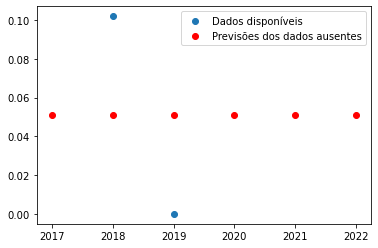

In [3]:
################

#Como só tem 2 anos com dados, apenas farei a média

################






#Previsões
prev_ausentes=np.array([])
for i in range(len(anos_para_prever)):
  prev_ausentes = np.append(prev_ausentes,prop.mean())


#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')


#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

In [4]:
#Lista de anos sem buracos e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)

prev_continua=np.array([])
for i in range(len(anos)):
  prev_continua = np.append(prev_continua,prop.mean())


np.save('prev_Pesc_cambucu_ind',prev_continua)